# Maskのランダム変換

In [1]:
import random
from PIL import Image
from PIL import ImageFilter
from glob import glob
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mask_root = './irregular_mask/disocclusion_img_mask/'
mask_paths = glob('{:s}/*.png'.format(mask_root))
N_mask = len(mask_paths)

In [3]:
mask_transform = transforms.Compose([
    transforms.RandomCrop(size=256),
#     transforms.Resize(size=256),
    transforms.ToTensor(),
])

In [4]:
mask = Image.open(mask_paths[random.randint(0, N_mask - 1)])
# mask = Image.open(mask_paths[0])
# https://nv-adlr.github.io/publication/partialconv-inpainting
# 影の部分を太くする
mask = mask.filter(ImageFilter.MinFilter(random.choice([1, 3, 5, 7])))
mask = mask.rotate(random.randint(0, 360), fillcolor=(255), expand=True)



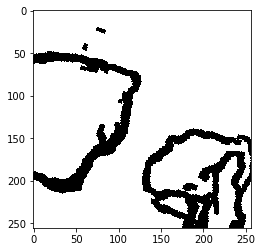

In [13]:
mask_t = mask_transform(mask.convert('RGB'))
mask_t = (mask_t>0.6)*1.0
plt.imshow(mask_t.permute(1, 2, 0))

In [142]:
mask_t

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [103]:
((mask_t==1.0)).sum()

tensor(194226)

In [100]:
((mask_t>0.1) & (mask_t<0.9)).sum()

tensor(1695)

In [136]:
mask_t.dtype

torch.float32

In [138]:
((mask_t>0.6)*1.0).dtype

torch.bool

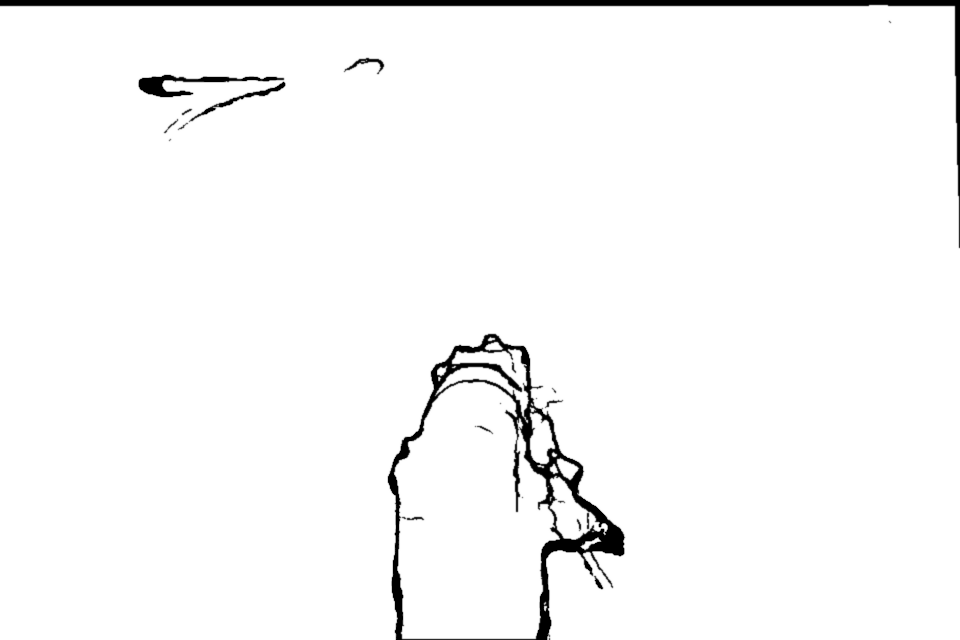

In [124]:
mask = Image.open(mask_paths[random.randint(0, N_mask - 1)])
mask_ = mask.convert('RGB')
mask_

# ログをCSVで保存

In [18]:
import pandas as pd
dc = {
    'valid': 0.93822,
    'hole': 0.5746276,
}

In [27]:
loss_df = pd.DataFrame()

loss_df_tmp = pd.DataFrame(dc.values(), index=dc.keys(), columns=[3]).T
loss_df = pd.concat([loss_df, loss_df_tmp])
loss_df